In [37]:
#matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [40]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [41]:
# View all of the classes that automap found
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [42]:
# Find the most recent date in the data set.
query = "Select max(date) from measurement;"

data = engine.execute(text(query))
for record in data:
    print(record)

('2017-08-23',)


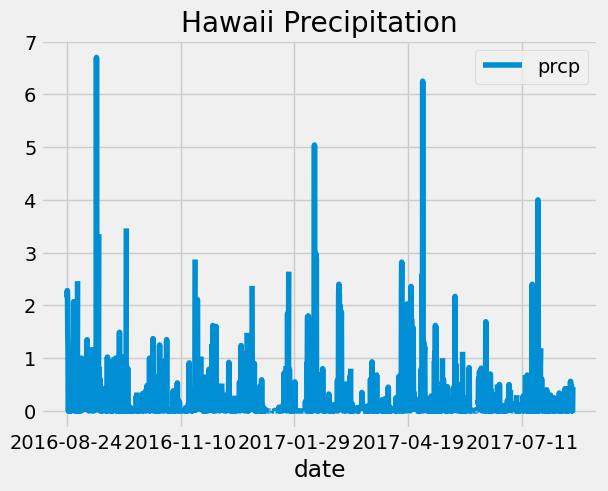

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data.
query = """ SELECT
                date,
                station,
                prcp
            FROM
                measurement
            WHERE
                date > '2016-08-23';
"""

df = pd.read_sql(text(query), con = engine)
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
df = df.sort_values(by = "date")

df.plot(kind = "line", x = "date", y = "prcp", title = "Hawaii Precipitation")
plt.show()

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.prcp.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset
query = "Select count(id) from station;"

data = engine.execute(text(query))
for record in data:
    print(record)


(9,)


In [46]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = """ SELECT
                station,
                count(id) as num_obs
            FROM 
                measurement
            GROUP BY
                station
            ORDER BY
                num_obs desc;
"""

df2 = pd.read_sql(text(query), con = engine)
df2.head(10)

,station,num_obs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """ SELECT
                min(tobs),
                max(tobs),
                avg(tobs)
            FROM
                measurement
            WHERE
                station = 'USC00519281';
""" 
df3 = pd.read_sql(text(query), con = engine)
df3

,min(tobs),max(tobs),avg(tobs)
0,54.0,85.0,71.663781


In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = """ SELECT
                date,
                station,
                tobs
            FROM
                measurement
            WHERE
                date >= '2016-08-23'
                AND station = 'USC00519281'
            ORDER BY
                date asc;
"""

df = pd.read_sql(text(query), con = engine)
df.head()

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


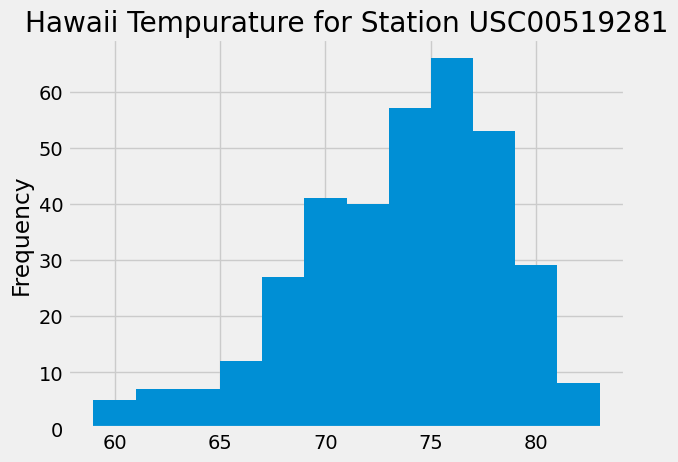

In [49]:
df.tobs.plot.hist(bins = 12, title = "Hawaii Tempurature for Station USC00519281")
plt.show()

# Close Session

In [51]:
# Close Session
session.close()

NameError: name 'session' is not defined